1.

In [23]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Dataset creation using Gaussian distributions

D1=torch.normal(2.0, 1.0,size=[1000,2])
D2=torch.normal(4.0, 1.0,size=[1000,2])

data = D1, D2

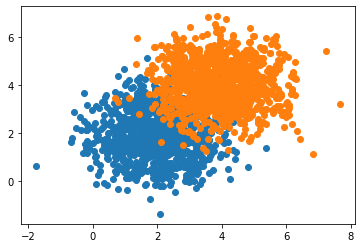

In [25]:
# Plotting the data

plt.scatter(D1[:,0], D1[:,1])
plt.scatter(D2[:,0], D2[:,1])

In [26]:
# Adding an extra dimension (1) to the data 

X=torch.empty(2000,D1.size(1)+1).fill_(1)
X[::2,:2] = D1
X[1::2,:2] = D2
print(X.shape)

# prepare the labels
Y=torch.empty(2000,1)
Y[::2,:2] = 1.0
Y[1::2,:2] = -1.0
print(Y.shape)

torch.Size([2000, 3])
torch.Size([2000, 1])


In [27]:
# Initialize W with all 0s
W = torch.zeros(X.size(1))
print(W)

tensor([0., 0., 0.])


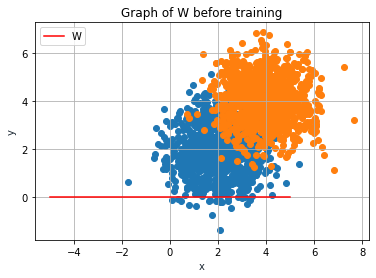

In [29]:
# Plotting the data and W before training

x = np.linspace(-5,5,1000)
y = np.zeros(1000,) 
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W before training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(D1[:,0], D1[:,1])
plt.scatter(D2[:,0], D2[:,1])
plt.grid()
plt.show()


In [30]:
#The perceptron training algorithm

def train_perceptron(x, y, w, nb_epochs_max):  
  for e in range(nb_epochs_max):
    nb_changes = 0
    for i in range(x.size(0)):
      if x[i].dot(w) * y[i] <= 0:
        w = w + y[i] * x[i]
        nb_changes = nb_changes + 1
        
    if nb_changes == 0:
        print('Early stopping at epoch number %d',e) 
        break;
  print('Number of changes: %d'%nb_changes)  # prints the number of chages in the end  
  return w

In [31]:
# Call the traning algorithm

W = train_perceptron(X,Y, W, 10)
print(W)

Number of changes: 229
tensor([ -9.3464, -14.3167,  76.0000])


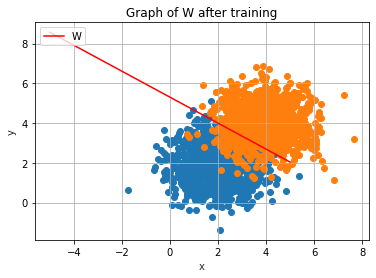

In [32]:
# Plot the data and W after training

x = np.linspace(-5,5,1000)
y = -(W[0].item()/W[1].item())*x - (W[2].item()/W[1].item())
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W after training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(D1[:,0], D1[:,1])
plt.scatter(D2[:,0], D2[:,1])
plt.grid()
plt.show()

With increase of γ separation increases so the number of iterations decreases


2.

In [33]:
def f(w, b, x):
	return 1.0/(1.0 + np.exp(-(w*x + b)))

In [34]:
def error(w, b):
	err = 0.0
	for x,y in data:
		fx = f(w,b,x)
		err += (fx - y) ** 2
	return err ** 0.5

In [35]:
def grad_b(w, b, x, y):
	fx = f(w,b,x)
	return (fx-y) * fx * (1 - fx)

In [36]:
def grad_w(w, b, x, y):
	fx = f(w,b,x)
	return (fx-y) * fx * (1 - fx) * x

In [37]:
def gradient_descent():
	w, b, eta, max_epochs = 1, 1, 0.01, 100
	for i in range(max_epochs):
		dw, db = 0, 0
		for x,y in data:
			dw += grad_w(w, b, x, y)
			db += grad_b(w, b, x, y)
		w = w - eta * dw
		b = b - eta * db
	return w

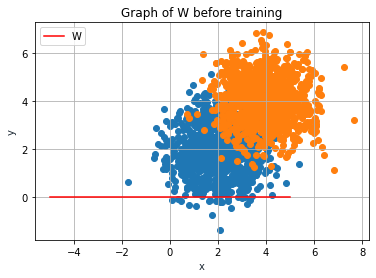

In [38]:
# Plotting the data and W before training

x = np.linspace(-5,5,100)
y = np.zeros(100,) 
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W before training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(D1[:,0], D1[:,1])
plt.scatter(D2[:,0], D2[:,1])
plt.grid()
plt.show()

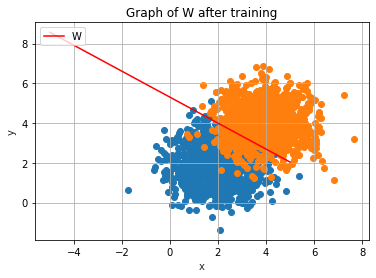

In [39]:
# Plot the data and W after training

x = np.linspace(-5,5,100)
y = -(W[0].item()/W[1].item())*x - (W[2].item()/W[1].item())
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W after training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(D1[:,0], D1[:,1])
plt.scatter(D2[:,0], D2[:,1])
plt.grid()
plt.show()

3.

In [40]:
from sklearn.datasets import make_circles

In [41]:
# Generating dataset that is not linearly separable in 2D
X, Y = make_circles(n_samples=100, noise=0.05)


In [43]:
activation = sum(weight_i * input_i) + bias

NameError: ignored

In [ ]:

def activate(weights, inputs):
 activation = weights[-1]
 for i in range(len(weights)-1):
 activation += weights[i] * inputs[i]
 return activation

In [ ]:
derivative = output * (1.0 - output)

In [ ]:
def transfer_derivative(output):
 return output * (1.0 - output)

In [ ]:
error = (output - expected) * transfer_derivative(output)

In [ ]:
error = (weight_k * error_j) * transfer_derivative(output)

In [ ]:
def backward_propagate_error(network, expected):
 for i in reversed(range(len(network))):
 layer = network[i]
 errors = list()
 if i != len(network)-1:
 for j in range(len(layer)):
 error = 0.0
 for neuron in network[i + 1]:
 error += (neuron['weights'][j] * neuron['delta'])
 errors.append(error)
 else:
 for j in range(len(layer)):
 neuron = layer[j]
 errors.append(neuron['output'] - expected[j])
 for j in range(len(layer)):
 neuron = layer[j]
 neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])